In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
import api_keys
print(api_keys)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

<module 'api_keys' from 'C:\\Users\\rorim\\Documents\\GitHub\\weatherpy-challenge\\starter_code\\api_keys.py'>


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1800)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1800)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
       
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
        

# Print the city count to confirm sufficient count
len(cities)

print(cities)



['taolanaro', 'prestea', 'hilo', 'cidreira', 'hong gai', 'canora', 'ushuaia', 'belushya guba', 'smithers', 'pisco', 'hermanus', 'khatanga', 'vaini', 'rikitea', 'busselton', 'hambantota', 'katsuura', 'lolua', 'manavgat', 'srednekolymsk', 'bluff', 'kapaa', 'san quintin', 'banda aceh', 'kot samaba', 'tuatapere', 'madang', 'nikolskoye', 'kazalinsk', 'karaul', 'saskylakh', 'avera', 'albany', 'cherskiy', 'pochutla', 'salalah', 'faanui', 'yellowknife', 'mtambile', 'upernavik', 'albuquerque', 'crystal beach', 'nhulunbuy', 'vari', 'mehamn', 'mataura', 'butaritari', 'ketchikan', 'ambilobe', 'kruisfontein', 'kununurra', 'ostrovnoy', 'kaitangata', 'bambous virieux', 'avarua', 'nome', 'mao', 'barentsburg', 'yulara', 'hami', 'attawapiskat', 'kasempa', 'punta arenas', 'te anau', 'san cristobal', 'luderitz', 'bilma', 'chapais', 'puerto ayora', 'salinas', 'la paz', 'dikson', 'dobre miasto', 'cabo san lucas', 'port lincoln', 'jamestown', 'harper', 'coquimbo', 'haines junction', 'vardo', 'carnarvon', 'da

In [3]:
#convert random cities list to dataframe
df = pd.DataFrame({'name':cities})
#verify results
print (df)
#write dataframe to csv file
df.to_csv('cities.csv')


              name
0        taolanaro
1          prestea
2             hilo
3         cidreira
4         hong gai
5           canora
6          ushuaia
7    belushya guba
8         smithers
9            pisco
10        hermanus
11        khatanga
12           vaini
13         rikitea
14       busselton
15      hambantota
16        katsuura
17           lolua
18        manavgat
19   srednekolymsk
20           bluff
21           kapaa
22     san quintin
23      banda aceh
24      kot samaba
25       tuatapere
26          madang
27      nikolskoye
28       kazalinsk
29          karaul
..             ...
692     walvis bay
693          vitim
694         tromso
695         hailey
696         sorong
697      okakarara
698   medicine hat
699         ixtapa
700  san policarpo
701        rungata
702       ploemeur
703        pangody
704          tabas
705        ballina
706       almaznyy
707       eldorado
708       meulaboh
709  sainte-thecle
710         sinjar
711     nova praha
712    keti 

## Perform API Calls

In [4]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "paris"
units = "imperial"
#city test
#city2 = "paris"

query_url = f"{url}appid={api_key}&q={city}&units={units}"
print(api_key)

#validate query_url
print(query_url)

c49c1ff805c847045953e0ccb9858d1e
http://api.openweathermap.org/data/2.5/weather?appid=c49c1ff805c847045953e0ccb9858d1e&q=paris&units=imperial


In [5]:
#Import the global cities csv, make a dataframe, and take a random sampling.
cities_df = pd.read_csv("cities.csv")
cities_final_df=pd.DataFrame({'name':cities})
#cities_df.head()
cities_final_df = cities_final_df.sample(n=600)
#cities_final_df.head()
cities_final_df.head()
cities_final_df.to_csv('cities_final.csv')

In [6]:
# lists for holding city values for temp (F), humidity (%),cloudiness (%), and windspeed (mph) relationships to latitude
open_weather_city_number = []
temp = []
humidity = []
cloudiness = []
windspeed = []
city_name=[]
latitude=[]
longitude=[]
hold_value = 0

# Query the API with Coordinates and create lists with Temperature, Humidity, Wind Speed, and Cloudiness Info.
query_url = f"{url}appid={api_key}&q={city}&units={units}"
for index, row in cities_final_df.iterrows():
    city = row["name"]
    query = f"{url}appid={api_key}&q={city}&units={units}"
    response = requests.get(query).json()
    #print(response)
    
    try:
            open_weather_city_number.append(response['id'])
            temp.append(response['main']['temp'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            windspeed.append(response['wind']['speed'])
            latitude.append(response['coord']['lat'])
            longitude.append(response['coord']['lon'])
            city_name.append(city)
            # Print the current process's information:
            hold_value = hold_value + 1
            print(f"{hold_value}: Data received for the following City ID Number and Name:")
            print(f"City ID Number: {response['id']}")
            print(f"City Name: {city}")
            print(f"-----------------------------------------")
    except KeyError:
            print(f"!!!!****{[response,city]}****!!!!")

1: Data received for the following City ID Number and Name:
City ID Number: 2644605
City Name: lerwick
-----------------------------------------
2: Data received for the following City ID Number and Name:
City ID Number: 1273294
City Name: dwarka
-----------------------------------------
3: Data received for the following City ID Number and Name:
City ID Number: 2455290
City Name: kidal
-----------------------------------------
4: Data received for the following City ID Number and Name:
City ID Number: 1283679
City Name: banepa
-----------------------------------------
5: Data received for the following City ID Number and Name:
City ID Number: 3466165
City Name: cidreira
-----------------------------------------
6: Data received for the following City ID Number and Name:
City ID Number: 7647007
City Name: san carlos de bariloche
-----------------------------------------
7: Data received for the following City ID Number and Name:
City ID Number: 6201424
City Name: mataura
--------------

56: Data received for the following City ID Number and Name:
City ID Number: 659169
City Name: hamina
-----------------------------------------
57: Data received for the following City ID Number and Name:
City ID Number: 4267710
City Name: sitka
-----------------------------------------
58: Data received for the following City ID Number and Name:
City ID Number: 6149996
City Name: smithers
-----------------------------------------
59: Data received for the following City ID Number and Name:
City ID Number: 2012956
City Name: yerbogachen
-----------------------------------------
60: Data received for the following City ID Number and Name:
City ID Number: 4501427
City Name: port elizabeth
-----------------------------------------
61: Data received for the following City ID Number and Name:
City ID Number: 3407703
City Name: amontada
-----------------------------------------
62: Data received for the following City ID Number and Name:
City ID Number: 2015179
City Name: tommot
------------

110: Data received for the following City ID Number and Name:
City ID Number: 3423146
City Name: ilulissat
-----------------------------------------
111: Data received for the following City ID Number and Name:
City ID Number: 2278158
City Name: buchanan
-----------------------------------------
112: Data received for the following City ID Number and Name:
City ID Number: 3019766
City Name: la baule-escoublac
-----------------------------------------
113: Data received for the following City ID Number and Name:
City ID Number: 5855051
City Name: ewa beach
-----------------------------------------
!!!!****[{'cod': '404', 'message': 'city not found'}, 'sitio novo do tocantins']****!!!!
114: Data received for the following City ID Number and Name:
City ID Number: 5293083
City Name: douglas
-----------------------------------------
115: Data received for the following City ID Number and Name:
City ID Number: 3137942
City Name: sola
-----------------------------------------
116: Data receiv

166: Data received for the following City ID Number and Name:
City ID Number: 5454711
City Name: albuquerque
-----------------------------------------
167: Data received for the following City ID Number and Name:
City ID Number: 1495626
City Name: pangody
-----------------------------------------
!!!!****[{'cod': '404', 'message': 'city not found'}, 'palabuhanratu']****!!!!
168: Data received for the following City ID Number and Name:
City ID Number: 5866063
City Name: kenai
-----------------------------------------
!!!!****[{'cod': '404', 'message': 'city not found'}, 'svetlyy']****!!!!
169: Data received for the following City ID Number and Name:
City ID Number: 1015776
City Name: bredasdorp
-----------------------------------------
170: Data received for the following City ID Number and Name:
City ID Number: 2409663
City Name: daru
-----------------------------------------
171: Data received for the following City ID Number and Name:
City ID Number: 5972291
City Name: havre-saint-pi

219: Data received for the following City ID Number and Name:
City ID Number: 3069236
City Name: nymburk
-----------------------------------------
220: Data received for the following City ID Number and Name:
City ID Number: 3366880
City Name: hermanus
-----------------------------------------
221: Data received for the following City ID Number and Name:
City ID Number: 3388456
City Name: sao jose da coroa grande
-----------------------------------------
222: Data received for the following City ID Number and Name:
City ID Number: 1529651
City Name: altay
-----------------------------------------
!!!!****[{'cod': '404', 'message': 'city not found'}, 'illoqqortoormiut']****!!!!
223: Data received for the following City ID Number and Name:
City ID Number: 304854
City Name: manavgat
-----------------------------------------
!!!!****[{'cod': '404', 'message': 'city not found'}, 'nizhneyansk']****!!!!
224: Data received for the following City ID Number and Name:
City ID Number: 1812101
City

272: Data received for the following City ID Number and Name:
City ID Number: 3911925
City Name: el alto
-----------------------------------------
273: Data received for the following City ID Number and Name:
City ID Number: 2120047
City Name: ust-omchug
-----------------------------------------
274: Data received for the following City ID Number and Name:
City ID Number: 2295840
City Name: prestea
-----------------------------------------
275: Data received for the following City ID Number and Name:
City ID Number: 1848277
City Name: yonago
-----------------------------------------
276: Data received for the following City ID Number and Name:
City ID Number: 3119841
City Name: beira
-----------------------------------------
277: Data received for the following City ID Number and Name:
City ID Number: 1162094
City Name: ziarat
-----------------------------------------
278: Data received for the following City ID Number and Name:
City ID Number: 2655288
City Name: boddam
---------------

326: Data received for the following City ID Number and Name:
City ID Number: 2119626
City Name: yagodnoye
-----------------------------------------
327: Data received for the following City ID Number and Name:
City ID Number: 2702977
City Name: dalvik
-----------------------------------------
328: Data received for the following City ID Number and Name:
City ID Number: 3167595
City Name: santa margherita ligure
-----------------------------------------
329: Data received for the following City ID Number and Name:
City ID Number: 5404476
City Name: ukiah
-----------------------------------------
330: Data received for the following City ID Number and Name:
City ID Number: 2126199
City Name: cherskiy
-----------------------------------------
331: Data received for the following City ID Number and Name:
City ID Number: 3128760
City Name: horta
-----------------------------------------
332: Data received for the following City ID Number and Name:
City ID Number: 778707
City Name: mehamn
-

380: Data received for the following City ID Number and Name:
City ID Number: 2610343
City Name: vestmanna
-----------------------------------------
!!!!****[{'cod': '404', 'message': 'city not found'}, 'arkhangelos']****!!!!
381: Data received for the following City ID Number and Name:
City ID Number: 6355222
City Name: yulara
-----------------------------------------
!!!!****[{'cod': '404', 'message': 'city not found'}, 'taolanaro']****!!!!
382: Data received for the following City ID Number and Name:
City ID Number: 5855927
City Name: hilo
-----------------------------------------
383: Data received for the following City ID Number and Name:
City ID Number: 3451138
City Name: rio grande
-----------------------------------------
!!!!****[{'cod': '404', 'message': 'city not found'}, 'bolungarvik']****!!!!
384: Data received for the following City ID Number and Name:
City ID Number: 3374235
City Name: sal rei
-----------------------------------------
385: Data received for the followin

432: Data received for the following City ID Number and Name:
City ID Number: 1263942
City Name: manavalakurichi
-----------------------------------------
433: Data received for the following City ID Number and Name:
City ID Number: 6050066
City Name: la ronge
-----------------------------------------
434: Data received for the following City ID Number and Name:
City ID Number: 3388626
City Name: sao joao de pirabas
-----------------------------------------
435: Data received for the following City ID Number and Name:
City ID Number: 3372783
City Name: ponta delgada
-----------------------------------------
436: Data received for the following City ID Number and Name:
City ID Number: 3870243
City Name: taltal
-----------------------------------------
437: Data received for the following City ID Number and Name:
City ID Number: 1006984
City Name: east london
-----------------------------------------
438: Data received for the following City ID Number and Name:
City ID Number: 5006946
Ci

487: Data received for the following City ID Number and Name:
City ID Number: 6138118
City Name: sainte-thecle
-----------------------------------------
488: Data received for the following City ID Number and Name:
City ID Number: 5577147
City Name: fort collins
-----------------------------------------
489: Data received for the following City ID Number and Name:
City ID Number: 6071618
City Name: medicine hat
-----------------------------------------
490: Data received for the following City ID Number and Name:
City ID Number: 3420846
City Name: qaqortoq
-----------------------------------------
491: Data received for the following City ID Number and Name:
City ID Number: 1106677
City Name: bambous virieux
-----------------------------------------
492: Data received for the following City ID Number and Name:
City ID Number: 1058381
City Name: morondava
-----------------------------------------
493: Data received for the following City ID Number and Name:
City ID Number: 1252795
City 

540: Data received for the following City ID Number and Name:
City ID Number: 1337607
City Name: kudahuvadhoo
-----------------------------------------
541: Data received for the following City ID Number and Name:
City ID Number: 934322
City Name: mahebourg
-----------------------------------------
542: Data received for the following City ID Number and Name:
City ID Number: 3896218
City Name: castro
-----------------------------------------
543: Data received for the following City ID Number and Name:
City ID Number: 2112444
City Name: kamaishi
-----------------------------------------
544: Data received for the following City ID Number and Name:
City ID Number: 4021858
City Name: guerrero negro
-----------------------------------------
!!!!****[{'cod': '404', 'message': 'city not found'}, 'dzhusaly']****!!!!
545: Data received for the following City ID Number and Name:
City ID Number: 3496831
City Name: mao
-----------------------------------------
546: Data received for the followin

In [7]:
# put city names from json response into dataframe
city_sample = pd.DataFrame(data = city_name, columns = ["Cities"])
city_sample.head()

,Cities
0,lerwick
1,dwarka
2,kidal
3,banepa
4,cidreira


In [8]:
# write city sample dataframe to CSV
city_sample.to_csv('city_sample.csv')

In [9]:
# retrieve required values for each city
city_sample["City ID Number"] = open_weather_city_number
city_sample["Current Temperature"] = temp
city_sample["Current Humidity"] = humidity
city_sample["Current Cloudiness"] = cloudiness
city_sample["Current Wind Speed"] = windspeed
city_sample["Latitude"] = latitude
city_sample["Longitude"] = longitude

city_sample.head()

,Cities,City ID Number,Current Temperature,Current Humidity,Current Cloudiness,Current Wind Speed,Latitude,Longitude
0,lerwick,2644605,59.00,87,20,6.93,60.15,-1.15
1,dwarka,1273294,80.60,88,75,2.73,28.58,77.04
2,kidal,2455290,95.96,32,32,7.43,18.44,1.41
3,banepa,1283679,69.80,100,75,11.41,27.63,85.52
4,cidreira,3466165,67.16,76,0,10.45,-30.17,-50.22


In [10]:
# write revised city sample dataframe to CSV
city_sample.to_csv('city_sample2.csv')

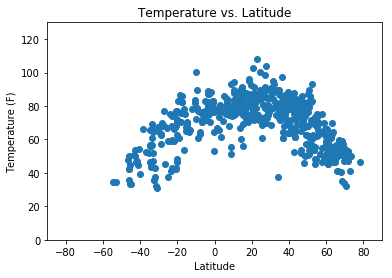

In [11]:
# Temperature vs.Latitude scatter plot
plt.scatter(city_sample["Latitude"],city_sample["Current Temperature"])
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90,90)
plt.ylim(0,130)

# write plot to png file
plt.savefig("temp_vs_lat.png")
# display plot
plt.show()

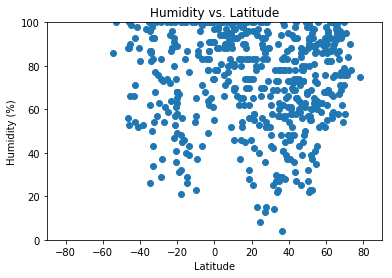

In [12]:
# Humidity vs. Latitude scatter plot
plt.scatter(city_sample["Latitude"],city_sample["Current Humidity"])
plt.title("Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-90,90)
plt.ylim(0,100)

# write plot to png file
plt.savefig("humid_vs_lat.png")
# display plot
plt.show()

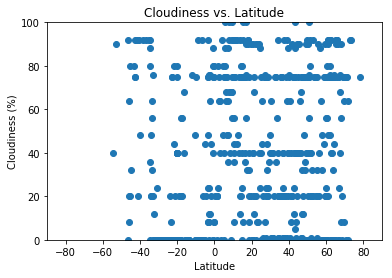

In [13]:
# Cloudiness vs. Latitude scatter plot
plt.scatter(city_sample["Latitude"],city_sample["Current Cloudiness"])
plt.title("Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90,90)
plt.ylim(0,100)

# write plot to png file
plt.savefig("cloud_vs_lat.png")
# display plot
plt.show()

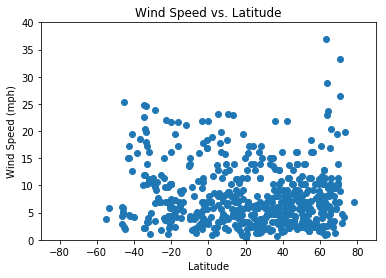

In [14]:
# Windspeed vs. Latitude scatter plot
plt.scatter(city_sample["Latitude"],city_sample["Current Wind Speed"])
plt.title("Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-90,90)
plt.ylim(0,40)

# write plot to png file
plt.savefig("windsp_vs_lat.png")
# display plot
plt.show()

## Three observations of the WeatherPy Data

In [ ]:
# 1. City temperatures drop as you move farther away from the equator. The highest temperatures were recorded in cities located between approximately -10 and 30 degrees latitude.
# 2. Humidity and wind speeds are highest in cities located in the Northern Hemisphere. The highest city humidities were recorded between 40 and 70 degrees latitude. And the highest city wind speeds were recorded between 60 and 80 degrees north of the equator.
# 3. The Southern Hemisphere, particularly at and below 60 degrees south of the equator, city weather data is not recorded. This is probably because, at this latitude on the planet, there are fewer cities because of the ocean coverage and the fact that there can be no city without land.
# * A more accurate analysis of global weather should be measured by scientific instruments located across the entire planet; measuring conditions on land, ice, and sea. Using only city data limits us to analyzing weather conditions in places where humans live.